# Language identification based on prosodic features


---

## Theoretical background
<br/>

Prosody is the branch linguistic concerning the suprasegmental features of human speech. Some of these are speech rate, intonation and rythm and they play a fundamental role in the communication act. Prosodic analysis in the frame of a particular language shows that a certain message conveys different shades of meaning due to the variations of these attributes and gives us an idea on how pragmatic meaning is acoustically represented during speech (Leone, Maturi, 2006). 
<br/>
The acoustic features through which prosody can be tracked are:
<br/>
<br/>
*   **Pitch**: it represents the rate of vibration of the vocal folds over time (frequency) and it's expressed in Hz.  It is different for each speaker since it depends on the physical conformation of the vocal tract, gender and age and its variation shapes the intonation in speech utterances.
<br/>

*   **Intensity**: it's the amount of energy (amplitude) over time and is expressed in dB. Peaks of intensity represent emphasis on a certain element.
<br/>

If the analysis of speech rythm shifts to a cross-linguistic perspective, there are different kind of rythm patterns that divide languages in three main groups:


1. Syllable-timed languages: the rythm is marked on syllables (Italian, Spanish, Finnish)

2. Stress-timed languages: the rythm is marked on stressed syllables (German, English, Dutch)

3. Mora-timed languages: rythm is marked on mora (Japanese)


These differences depend on phonologic, phonetic, lexical and synctatic facts. On a phonetic level, the patterns of rythm vary due to speech rate and tempo variation, so langauges that are classified as syllable-timed can tend to a stress-timed rythm in some situation and, on the other hand, stresst-timed languages can have a  syllable-timed language rythm (Auer, 2001).

<br/>
<br/>

## Aim of the project

The aim of this project is to train a Neural Network to create a language classifier based on audio data. The features used for the classification consist intensity and pitch, acoustic features that represent prosody in human speech.
The languages involved in the project are Italian and German.
During the project the sampling rate of the data is manipulated to create experimental sets and see how the learning of the model differs by changing the amount of information used as an input. Also, different kinds of binning and two kinds of matrices (2D and 3D) are used as experimental paramenters.  

<br/>

## Data

The audio files for the training, test and validation have been taken from Common Voice. This is a project of the Mozilla Foundation consisting in an open-source audio dataset involving more than 80 languages. The audio clips are read sentences generated and reviewed by volunteer contributors, speakers of different gender and age. Speaker's accent is also tracked in the corpus. 
Each audio file is well documented with demographic metadata, the read text and the information of the audio including path to the downloaded audio file, the decoded audio array, and the sampling rate.

I think this is a good corpus to work on this taks because it's inclusive with respect to speaker gender, age and accents and since data consists in read sentences of length ranging from approximately 2 to 20 seconds the prosodic patterns are somehow homogeneous and the stress typology of the languages involved is preserved, helping the classification.

<br/>

## Problems and challenges

A problem is represented by the limited amount of data availale for certain languages (for example, there are ~20 hours of italian data). A consequence of the limited amount of data is that a balance between speakers that belong to different gender and age might be lacking. 
Another limitation is represented by the use of Google Colab, that in its free version provides GPU usage but the runtimes are limited to 12 hours and the RAM is limited to 16 GB. Managing such a big quantity of audio data has sometimes caused session crashes. 

<br/>

## Neural Network architecture

The task in this project consists in finding patterns in time sequences (arrays representing intonation - pitch variation - and intensity) and associate them to a certain language, so is basically classification of a time-sequence in which the order matters and has to be taken into account.
This kind of task (and many more concerning NLP) is usually tackled with Long-Short Term Memory  architectures, that are a type of Recurrent Neural Networks (RNN). 
In this kind of architecture the long-term dependencies among the elements of the sequence are learned by using output information as a part of the next input throughout the whole training. 

<br/>

**LSTM Architecture**

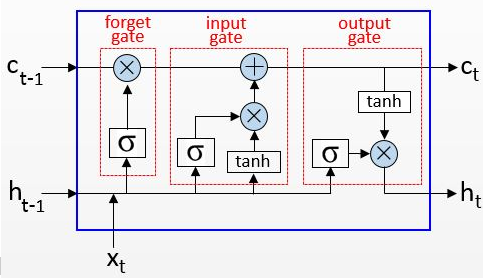



In the **forget gate** it is decided which long-term information should be discarded and which should be kept in the cell state.

In the **input gate** new information from the current input and previous output (short-term) is added to the cell state.

In the **output gate** current input, previous short-term memory and long-term memory are put together to produce the output that will be part of the input of the following cell.

<br/>

With padding truncating techniques it is possible to handle sequences of different length.
A LSTM model requires a **3D array** as an input, in which number of samples, number of timesteps and number of features are represented.

Convolutional Naural Networks (CNN) are a type of NN often used for image classification for their ability to recognize patterns by gradually filtering and learning the features of the sample data. 

These two models can be combined to get a NN robust in recognizing both sample-specific features and the long-term dependencies among them, as shown in one of the references study (Davallius, Ingvarsson, Ortheden, Pettersson, 2019). 




---


# Installings

In [2]:
# Getting datasets from Hugging face

# !pip install datasets[audio] --q
# !pip install datasets --q
# !pip install torchaudio --q
# from datasets import load_dataset, load_metric, Audio


# Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Audio processing
!pip install praat-parselmouth --q
import parselmouth
from IPython.display import Audio 
from IPython.core.display import display
from matplotlib import pyplot as plt

#NN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
!pip install transformers --q
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import numpy
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import torch 


# others
from pprint import pprint
import random
import seaborn as sns
import glob
import pandas as pd
import os
import numpy as np
import pickle
import re
import statistics

%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML

Mounted at /content/drive/
     |████████████████████████████████| 10.7 MB 5.0 MB/s 
     |████████████████████████████████| 4.4 MB 5.4 MB/s 
     |████████████████████████████████| 101 kB 13.2 MB/s 
     |████████████████████████████████| 596 kB 64.5 MB/s 
     |████████████████████████████████| 6.6 MB 47.7 MB/s 
/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML


# Getting the data

The data, consisting in Italian and German audio clips, was taken from the open-source Common Voice dataset through [Hugging Face](https://huggingface.co/datasets/common_voice).

Google Colab has some limitations and the download of the whole datasets it's really expensive in terms of time and memory.
One of the advantages of getting the data trhough Hugging Face is that the download of the whole corpus is not necessary if the 'streaming' parameter is set as True while loading the dataset. 


Another advantage of getting the data from the Hugging Face Hub is that the audio clips are preprocessed with a sampling rate of 48kHz.

<br/>

For each audio file the following information is provided:

<br/>

*   **client_id**: id of the person that made the recording
*   **path**: path to the audio file
*   **audio**: A dictionary containing the path to the downloaded audio file, the decoded audio array, and the sampling rate.
* **sentence**: The sentence the user was prompted to speak
* **up_votes**: How many upvotes the audio file has received from reviewers
* **down_votes**: How many downvotes the audio file has received from reviewers
* **age**: The age of the speaker.
* **gender**: The gender of the speaker
* **accent**: Accent of the speaker
* **locale**: The locale of the speaker
* **segment**: empty field

<br/>

Since the audio clips' length varies within a range of approximately 2 to 20 seconds, I sampled only the files that had a length between 7 and 15 seconds to train the classifier with relevant data.

In [ ]:
# function to load subsets from HF and retrieve information about each audio clip

def corpus_audio_sub(lang, len_min, len_max):

  """Takes a language id, and minimum and maximum length of the audiofile (in seconds).
  The subdataset of the desired language is loaded from the Hugging Face hub in streaming mode and filtered
  according to the desired length. Lastly, the information about the files is stored in a dictionary
  and saved in a pickle object in the current directory."""

  audio_dataset = load_dataset('common_voice', lang, split='train', streaming=True)
  sub_corpus = [ ]

  for el in audio_dataset:
    if len(el['audio']['array'])/el['audio']['sampling_rate'] >= len_min and len(el['audio']['array'])/el['audio']['sampling_rate'] <= len_max:
      audio_info = {'filename': el['audio']['path'], 'accent': el['accent'], 'gender': el['gender'], 'age' : el['age'], 'up_votes': el['up_votes'], 'length': len(el['audio']['array'])/el['audio']['sampling_rate']}
      sub_corpus.append(audio_info)
      if len(sub_corpus) == 15000:
        break

  pkl_name = f"{lang}_subcorpus_CV.pkl"
  with open(pkl_name, 'wb') as file:
    # A new file will be created
    pickle.dump(sub_corpus, file)
  return sub_corpus


In [ ]:
# sub_IT_corpus = corpus_audio_sub('it', 7, 15)
# sub_DE_corpus = corpus_audio_sub('de', 7, 15)
# sub_ES_corpus = corpus_audio_sub('es', 7, 15)

Now we can load the pickle file and store the information in a panda dataframe. This way it will be easier to have a look at the data.

## Italian data

In [9]:
# loading the info from the pickle file stored in the Drive

with open('it_subcorpus_CV.pkl', 'rb') as f:  
  info_IT_corpus = pickle.load(f)


In [4]:
IT_info_df_float = pd.DataFrame(info_IT_corpus) # let's keep this dataset with the exact length of each file

# let's create a df in which the length is reduced to an integer to group in a more effective way the files by thier length

IT_info_df = IT_info_df_float
IT_info_df['length'] = IT_info_df['length'].astype(int)

# this is id the list of files that consists in our italian dataset

IT_info_df.head()

,filename,accent,gender,age,up_votes,length
0,cv-corpus-6.1-2020-12-11/it/clips/common_voice...,,female,thirties,2,8
1,cv-corpus-6.1-2020-12-11/it/clips/common_voice...,,male,twenties,2,7
2,cv-corpus-6.1-2020-12-11/it/clips/common_voice...,,male,twenties,2,7
3,cv-corpus-6.1-2020-12-11/it/clips/common_voice...,,male,twenties,2,9
4,cv-corpus-6.1-2020-12-11/it/clips/common_voice...,,,,2,8


In [ ]:
# let's create some dataframes to have a better glance at the distribution of the data according to the other variables

it_gen_df = IT_info_df['gender'].value_counts().rename_axis('unique_values').reset_index(name='counts')
it_age_df = IT_info_df['age'].value_counts().rename_axis('unique_values').reset_index(name='counts')
it_len_df = IT_info_df['length'].value_counts().rename_axis('ITunique_values').reset_index(name='ITcounts')
it_acc_df = IT_info_df['accent'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In the italian dataset we have a total of 21:40 hours of data.

| seconds | counts | hours    |
|---------|--------|----------|
| 7       | 6381   | 12:24:27 |
| 8       | 2628   | 5:50:24  |
| 9       | 1162   | 2:54:18  |
| 10      | 184    | 0:30:40  |
| 11      | 1      | 0:00:11  |
| total   |        | 21:40:00 |

Let's have a look at the data distribution with some charts

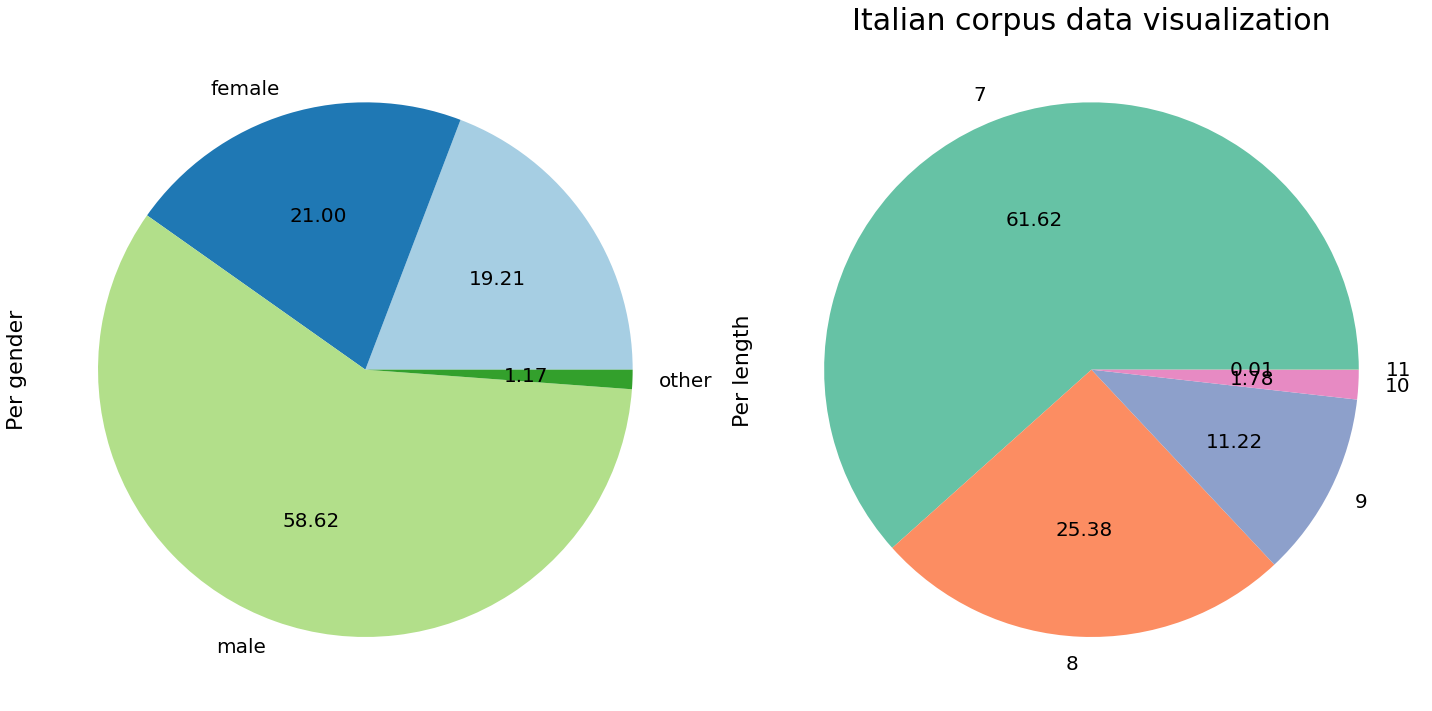

In [ ]:
# Visualization of some variable distributions in the italian dataset

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 15))

IT_info_df.groupby('gender').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20},
                                  colors=sns.color_palette("Paired", n_colors=4), ax=ax1)
IT_info_df.groupby('length').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20},
                                 colors=sns.color_palette("Set2", n_colors=5), ax=ax2)

plt.title("Italian corpus data visualization", fontdict = {'fontsize' : 30})
ax1.set_ylabel('Per gender', size=22)

ax2.set_ylabel('Per length', size=22)

plt.tight_layout()
plt.show()

## German data

In [5]:
# loading the info from the pickle file stored in the Drive

with open('de_subcorpus_CV.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
  info_DE_corpus = pickle.load(f)

In [6]:
DE_info_df_float = pd.DataFrame(info_DE_corpus) # let's keep this dataset with the exact elngth of each file

# let's create a df in which the length is reduced to an integer to group in a more effective way the files by thier length

DE_info_df = DE_info_df_float
DE_info_df['length'] = DE_info_df['length'].astype(int)

# this is our german dataset

DE_info_df.head()

,filename,accent,gender,age,up_votes,length
0,cv-corpus-6.1-2020-12-11/de/clips/common_voice...,,,,4,7
1,cv-corpus-6.1-2020-12-11/de/clips/common_voice...,germany,male,sixties,4,7
2,cv-corpus-6.1-2020-12-11/de/clips/common_voice...,germany,male,sixties,3,7
3,cv-corpus-6.1-2020-12-11/de/clips/common_voice...,germany,male,fourties,3,9
4,cv-corpus-6.1-2020-12-11/de/clips/common_voice...,germany,male,fourties,3,7


In [ ]:
# gender + age count german dataset

de_gen_df = DE_info_df['gender'].value_counts().rename_axis('unique_values').reset_index(name='counts')
de_age_df = DE_info_df['age'].value_counts().rename_axis('unique_values').reset_index(name='counts')
de_len_df = DE_info_df['length'].value_counts().rename_axis('DEunique_values').reset_index(name='DEcounts')

We have a total of 34:03 hours of german

| seconds | counts | hours    |
|---------|--------|----------|
| 7       | 6305   | 12:15:35 |
| 8       | 4001   | 8:53:28  |
| 9       | 2344   | 5:51:36  |
| 10      | 1239   | 3:26:30  |
| 11      | 612    | 1:52:12  |
| 12      | 303    | 1:00:36  |
| 13      | 162    | 0:35:06  |
| 14      | 32     | 0:07:28  |
| 15      | 2      | 0:00:30  |
| total   |        | 34:03:01 |

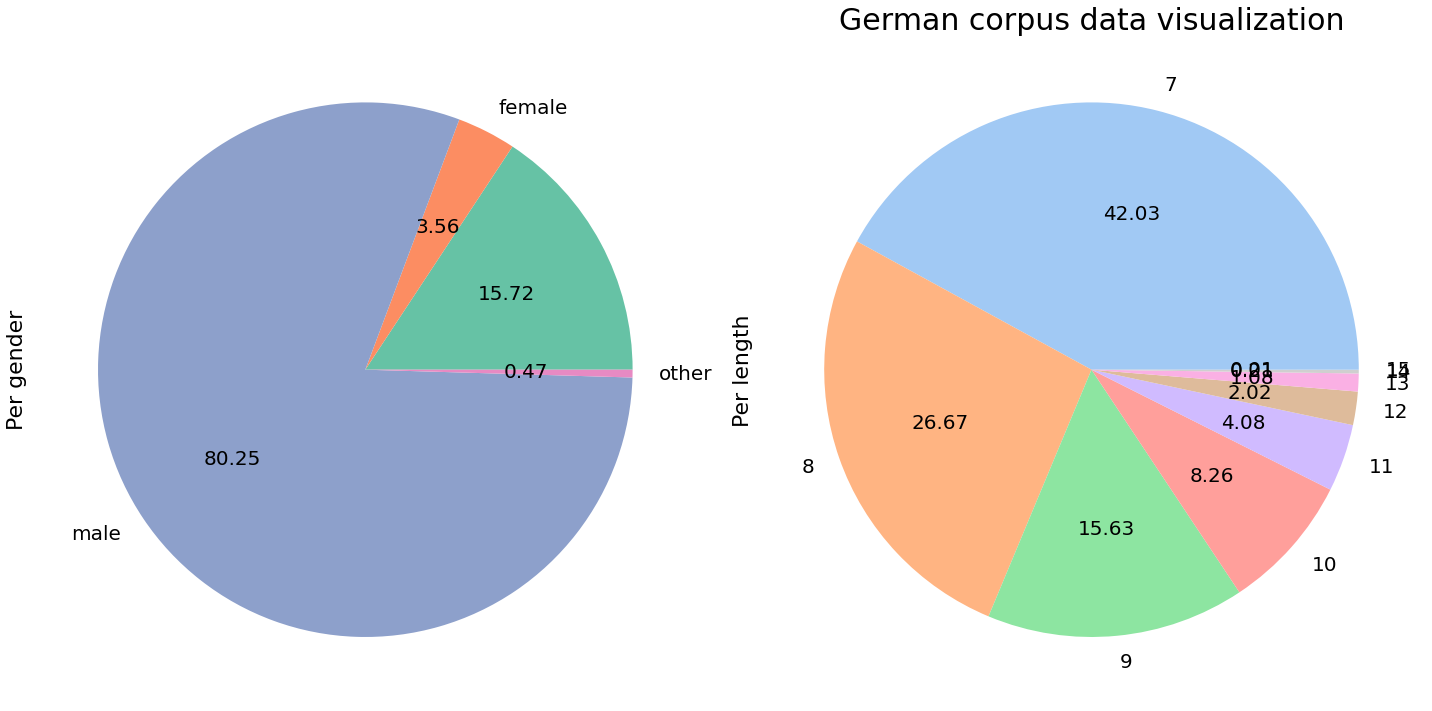

In [ ]:
# Visualization of some variable distributions in the italian dataset

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 15))

DE_info_df.groupby('gender').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20},
                                  colors=sns.color_palette("Set2", n_colors=5), ax=ax1)
DE_info_df.groupby('length').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20},
                                 colors=sns.color_palette("pastel", n_colors=8), ax=ax2)

plt.title("German corpus data visualization", fontdict = {'fontsize' : 30})
ax1.set_ylabel('Per gender', size=22)

ax2.set_ylabel('Per length', size=22)

plt.tight_layout()
plt.show()

## Length of audio clips

Let's have a look at the most common length on both corpora to decide the appropriate padding/truncating size that will be used later on to preprocess the data for the training.

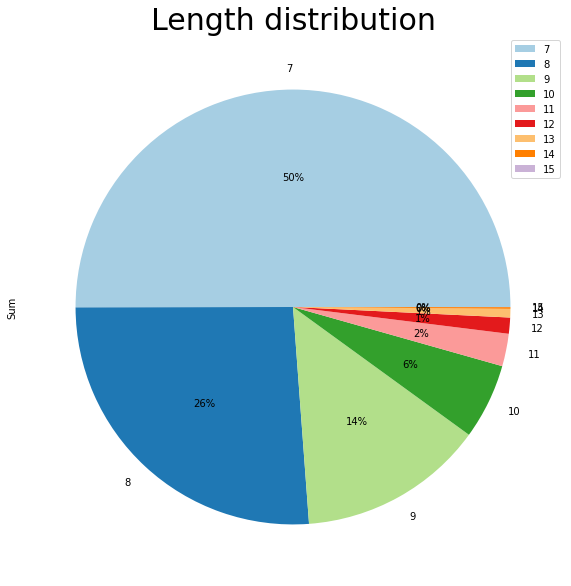

In [ ]:
deit_stack = pd.concat([de_len_df, it_len_df], axis=1)

deit_stack['ITcounts'] = deit_stack['ITcounts'].fillna(0)
deit_stack['ITcounts'] = deit_stack['ITcounts'].astype('int')
deit_stack.drop('ITunique_values', axis=1)

deit_stack['Sum'] = deit_stack[['DEcounts', 'ITcounts']].sum(axis=1)

crp_df = deit_stack[['DEunique_values', 'Sum']]

# plot

deit_stack.groupby(['DEunique_values']).sum().plot(kind='pie', y='Sum',
                                                         autopct='%1.0f%%', colors=sns.color_palette("Paired", n_colors=9),
                                                         figsize=(10, 10))
plt.title("Length distribution", fontdict = {'fontsize' : 30})
plt.show()


A common practice when deciding the pad/truncate threshold is to take the length of the longest element. However, in this corpus there are just few audio clips with the maximum length, so it is better to set the pad/truncating length according to the average length of the files which is 7/8 seconds.

In [7]:
# let's save in a list the files with the desired length

de8 = DE_info_df['filename'].loc[DE_info_df['length'] == 8]
it8 = IT_info_df['filename'].loc[IT_info_df['length'] == 8]

list8it = it8.values.tolist()
list8de = de8.values.tolist()

list_file8 = list8it + list8de 
list_file8 = [os.path.split(fname)[-1] for fname in list_file8] # 6629 files

# we will need this list later to retrieve the longest sequence to set that as pad limit

# Prosodic features extraction through Parselmouth


Now that we have the audio files, we have to extract the values corresponding to pitch and intensity for each one of them in order to use them as features for the training of the classifier.

The prosodic features are extracted through the [Parselmouth](https://parselmouth.readthedocs.io/en/stable/) library, that allows to use the functionalities of [Praat](https://www.fon.hum.uva.nl/praat/), a software that is used for the phonetic analysis of audio segments.

<br/>

With the main function each file is transformed into a Sound Object. The functions *to_pitch()* and *to_intensity()* allow to to extract the pitch and intensity arrays from each file.

### Features visualization

In [ ]:
# Functions to represent audio data

def draw_spectrogram(spectrogram, dynamic_range=70):
  X, Y = spectrogram.x_grid(), spectrogram.y_grid()
  sg_db = 10 * np.log10(spectrogram.values)
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
  plt.ylim([spectrogram.ymin, spectrogram.ymax])
  plt.xlabel("time [s]")
  plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
  plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
  plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
  plt.grid(False)
  plt.ylim(0)
  plt.ylabel("intensity [dB]")
  return intensity.values.T

def draw_pitch(pitch):
  # Extract selected pitch contour, and
  # replace unvoiced samples by NaN to not plot
  pitch_values = pitch.selected_array['frequency']
  pitch_values[pitch_values==0] = np.nan
  plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
  plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
  plt.grid(False)
  plt.ylim(0, pitch.ceiling)
  plt.ylabel("fundamental frequency [Hz]")
  
  return pitch.selected_array['frequency']

In [ ]:
ITaudio_corpus = [f for f in glob.glob('/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/COMMON_VOICE/ita_sub/sub_sub_it/*.mp3')]
DEaudio_corpus = [f for f in glob.glob('/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/COMMON_VOICE/de_sub/sub_sub_de/*.mp3')]

Let's plot some audio files with the respective pitch and intensity

In [ ]:
audio_it_raw = ITaudio_corpus[78]
audio_de_raw = DEaudio_corpus[9]

In [ ]:
audio_it = parselmouth.Sound(ITaudio_corpus[78])
audio_de = parselmouth.Sound(DEaudio_corpus[9])

In [ ]:
sns.set() 
plt.rcParams['figure.dpi'] = 100

Italian example file

In [ ]:
display(Audio(audio_it_raw, autoplay=False))

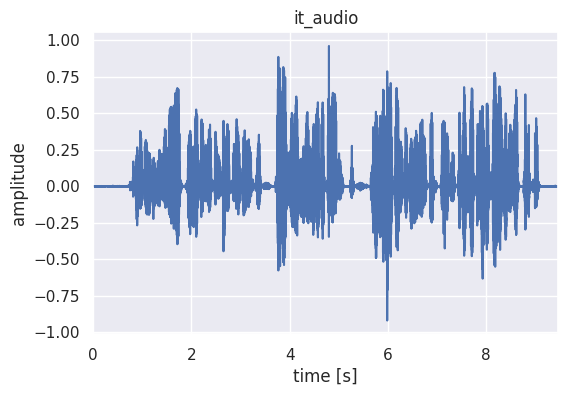

In [ ]:
plt.figure()
plt.plot(audio_it.xs(), audio_it.values.T)
plt.xlim([audio_it.xmin, audio_it.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.title("it_audio")

plt.show() 

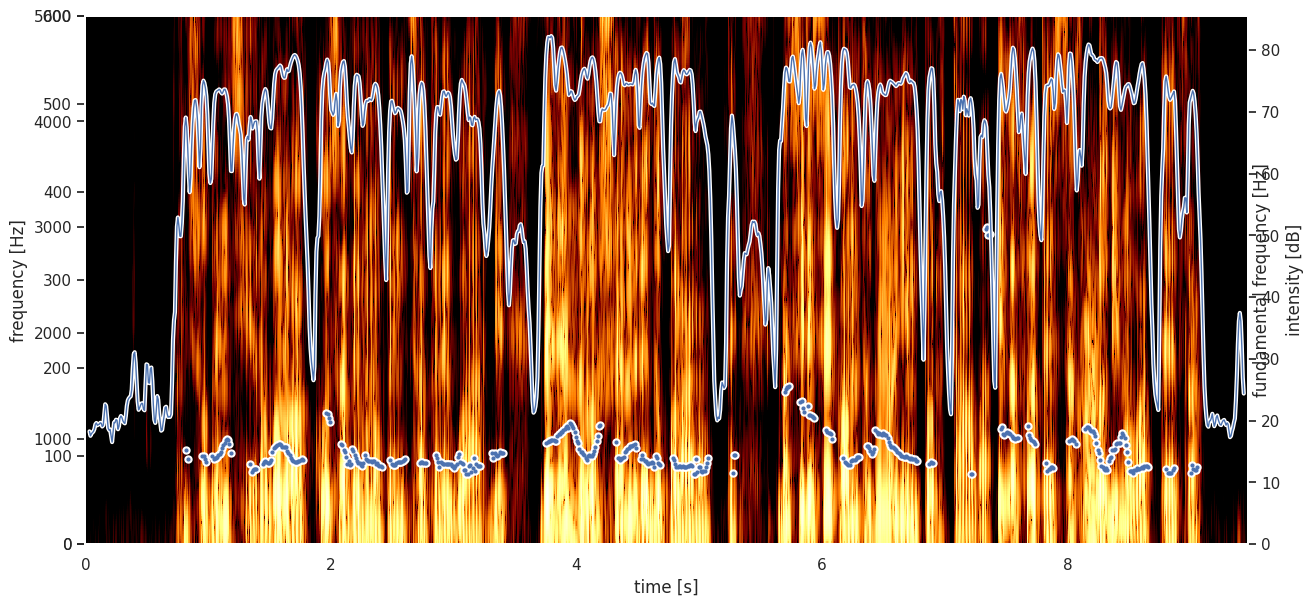

In [ ]:

IT_pitch = audio_it.to_pitch()

spectrogramPI = audio_it.to_spectrogram()
draw_spectrogram(spectrogramPI)
plt.twinx()
draw_pitch(IT_pitch)

IT_intensity = audio_it.to_intensity()
plt.twinx()
draw_intensity(IT_intensity)
plt.xlim([audio_it.xmin, audio_it.xmax])
plt.show()

German example file

In [ ]:
display(Audio(audio_de_raw, autoplay=False))

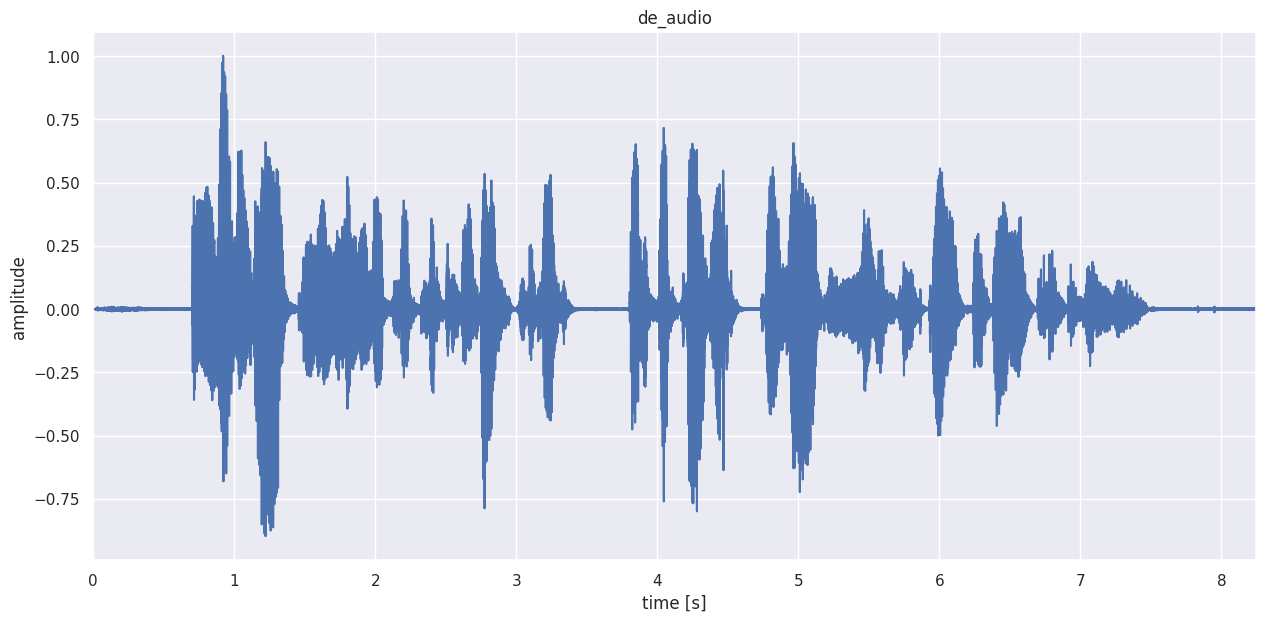

In [ ]:
plt.figure()
plt.plot(audio_de.xs(), audio_de.values.T)
plt.xlim([audio_de.xmin, audio_de.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.title("de_audio")

plt.show() 

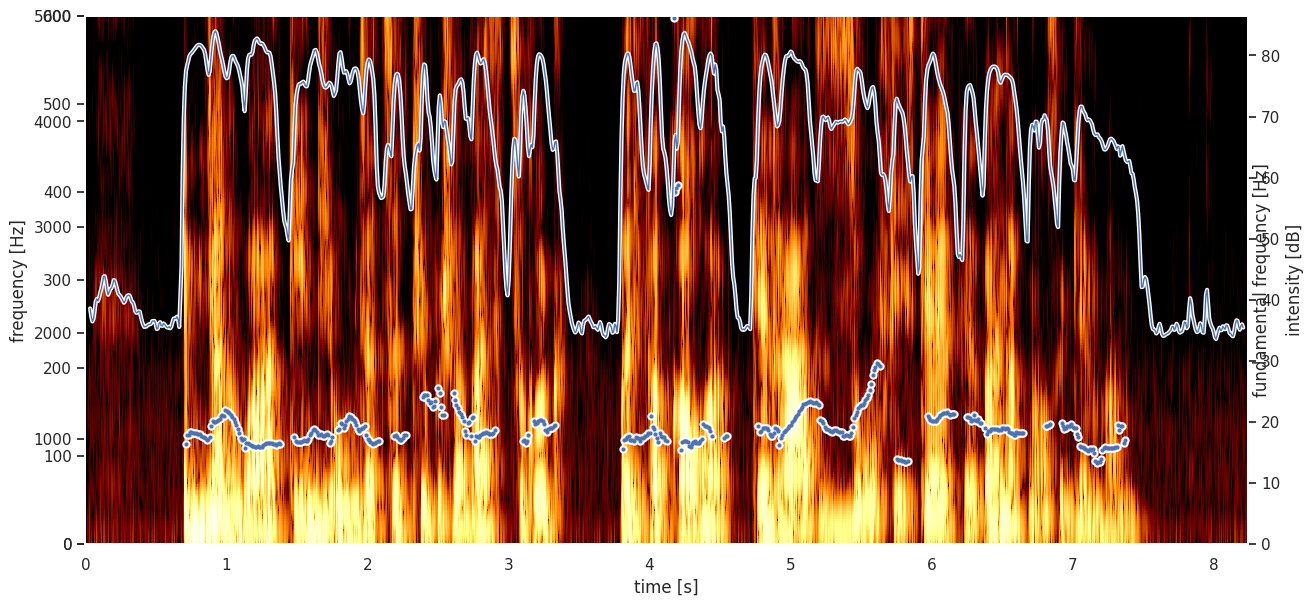

In [ ]:
DE_pitch = audio_de.to_pitch()

spectrogramPIde = audio_de.to_spectrogram()
draw_spectrogram(spectrogramPIde)
plt.twinx()
draw_pitch(DE_pitch)

DE_intensity = audio_de.to_intensity()
plt.twinx()
draw_intensity(DE_intensity)
plt.xlim([audio_de.xmin, audio_de.xmax])

plt.show()

Let's see in deatail what's inside the pitch and intensity objects created by Parselmouth

In [ ]:
print(DE_pitch)

Object type: Pitch
Object name: <no name>
Date: Sun Jun 26 07:40:30 2022

Time domain:
   Start time: 0 seconds
   End time: 8.242979166666666 seconds
   Total duration: 8.242979166666666 seconds
Time sampling:
   Number of frames: 821 (468 voiced)
   Time step: 0.01 seconds
   First frame centred at: 0.021489583333332726 seconds
Ceiling at: 600 Hz

Estimated quantiles:
   10% = 111.378903 Hz = 101.424743 Mel = 1.86571181 semitones above 100 Hz = 3.30704472 ERB
   16% = 115.291279 Hz = 104.668674 Mel = 2.4634007 semitones above 100 Hz = 3.40683678 ERB
   50% = 127.940828 Hz = 115.027952 Mel = 4.26572068 semitones above 100 Hz = 3.72316779 ERB
   84% = 146.388324 Hz = 129.79404 Mel = 6.59760589 semitones above 100 Hz = 4.16808508 ERB
   90% = 156.110471 Hz = 137.419382 Mel = 7.71080772 semitones above 100 Hz = 4.3951947 ERB
Estimated spreading:
   84%-median = 18.47 Hz = 14.78 Mel = 2.334 semitones = 0.4454 ERB
   median-16% = 12.66 Hz = 10.37 Mel = 1.804 semitones = 0.3167 ERB
   90%-1

In [ ]:
print(IT_intensity)

Object type: Intensity
Object name: <no name>
Date: Sun Jun 26 07:41:00 2022

Time domain:
   Start time: 0 seconds
   End time: 9.466979166666667 seconds
   Total duration: 9.466979166666667 seconds
Time sampling:
   Number of frames: 1176
   Time step: 0.008 seconds
   First frame centred at: 0.03348958333333352 seconds



### Features extraction

<br/>

Audio files are retrieved from the local path and the acoustic features are extracted through Parselmouth.
The timestep for both features has been set to 0.01 seconds and a limit of files to process has been set to 10500 to avoid RAM overload.

<br/>

A second function has been built to check if there are duplicates among the pitch and intensity arrays.



In [ ]:
def prosody_feats(audiofile_df, corpus_path, lang):

  """Takes in a dataframe in which file names and a paths are stored. If the file exists in the path,
  it is retrieved and passed to the Sound method of the Parselmouth library and then pitch and intensity arrays
  are extracted with the respective functions. The arrays corresponding to each feature are then stored 
  as values of a dictionary in which the key is the file name. The dictionary is then saved into a pickle file."""

  
  print("Current working directory: {0}".format(os.getcwd())) # print cd
  os.chdir(corpus_path)     # change directory with path
  print("Current working directory: {0}".format(os.getcwd())) # print cd

  data_dict = { } # dictionary of dictionaries {audioID : {pitch : array, 
  #                                                       intensity :array}}
  
  for audio in audiofile_df['filename']:
    audio = os.path.split(audio)[-1]
    # print(audio)
    if os.path.isfile(audio):
      
      temp_feats_dict = { }  # temp dict to store pitch and intensity arrays
      snd = parselmouth.Sound(audio)
      pitch_arr = snd.to_pitch().selected_array['frequency']      
      intensity_arr = snd.to_intensity(time_step=0.01).values.T
      temp_feats_dict['pitch'] = pitch_arr
      temp_feats_dict['intensity'] = intensity_arr
    else:
      temp_feats_dict = 'file not found'
      
      pass

    data_dict[str(audio)] = temp_feats_dict
    if len(data_dict) == 10500:
      break
    
  pkl_name = f"{lang}_pros_arrays.pkl"
  with open(pkl_name, 'wb') as file:
    # A new file will be created
    pickle.dump(data_dict, file)

  return data_dict




def check_duplicates_arr(arr_dic):

  """given a dictionary it checks if there are equal values corresponding to
  different keys and returns a list with the duplicate values and another list with 
  the correspondent keys."""

  rev_dict = {}
    
  for key, value in arr_dic.items():
    rev_dict.setdefault(str(value), set()).add(key)
        
  result_val = [key for key, values in rev_dict.items()
                                if len(values) > 1]

  result_key= [values for key, values in rev_dict.items()
                                if len(values) > 1]

            
  return result_key, result_val

### Italian features extraction

In [ ]:
# WORKING AND DONE

# Extracting  pitch and intensity arrays from the dataset initially downloaded through Hugging Face on the Drive.
# takes ~2 hour

# IT_pros_feats_arr = prosody_feats(IT_info_df,'/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/cv_DATA/downloads/extracted/6ce743ba81adcb6a729f5224d7273fa592d1b680685aec258cd02179b21e5737/cv-corpus-6.1-2020-12-11/it/clips', 'it_int_ok')
# IT_pros_feats_arr

In [ ]:
# pkl load italian data array

%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/cv_DATA/downloads/extracted/6ce743ba81adcb6a729f5224d7273fa592d1b680685aec258cd02179b21e5737/cv-corpus-6.1-2020-12-11/it

with open('it_int_ok_pros_arrays.pkl', 'rb') as f:  
  ita_arrays = pickle.load(f)  #10356 files

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/cv_DATA/downloads/extracted/6ce743ba81adcb6a729f5224d7273fa592d1b680685aec258cd02179b21e5737/cv-corpus-6.1-2020-12-11/it


Let's check if there are duplicates among the values and, if so, which are the values and the correspondent files.

In [ ]:
it_dupK, it_dupV = check_duplicates_arr(ita_arrays)

len(it_dupK)

1

In [ ]:
# it's a list of keys, we have to flatten it tp get the keys. 

flattenK_ita = [ ]

for file_list in it_dupK:
  for file_n in file_list:
    flattenK_ita.append(file_n)

len(flattenK_ita) # we have 3167 problematic files.


3167

What's wrong with the files? Let's try to retrieve them from the corpus stored on the Drive.

In [ ]:
%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/cv_DATA/downloads/extracted/6ce743ba81adcb6a729f5224d7273fa592d1b680685aec258cd02179b21e5737/cv-corpus-6.1-2020-12-11/it/clips

it_audio_in_dir = [ ] # list with audiofiles that are in the Drive
missing_ita_audio = [ ] # list with audiofiles that are not in the Drive

for el in flattenK_ita:
  if os.path.isfile(el):
    it_audio_in_dir.append(el)

  else:
    missing_ita_audio.append(el)


missing_ita_audio[:4] #3167

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/cv_DATA/downloads/extracted/6ce743ba81adcb6a729f5224d7273fa592d1b680685aec258cd02179b21e5737/cv-corpus-6.1-2020-12-11/it/clips


['common_voice_it_22446636.mp3',
 'common_voice_it_21344233.mp3',
 'common_voice_it_22788485.mp3',
 'common_voice_it_20945954.mp3']

In [ ]:
# let's save the file list in a txt document that will be passed to an auxiliary 
# Powershell script to look efficiently for the files in the local path. 

%cd /content/drive/MyDrive/MACHINE_LEARNING

with open("missingITA.txt", "w") as output:
  for filen in missing_ita_audio:
    output.write('%s\n' % filen)

Now we see that we have 3167 files missing in the directory.
Since I also donwnoalded the whole CV italian corpus on my local machine, I'll retrieve them from the local directory through a Powershell auxiliary script and then upload them on the Drive.

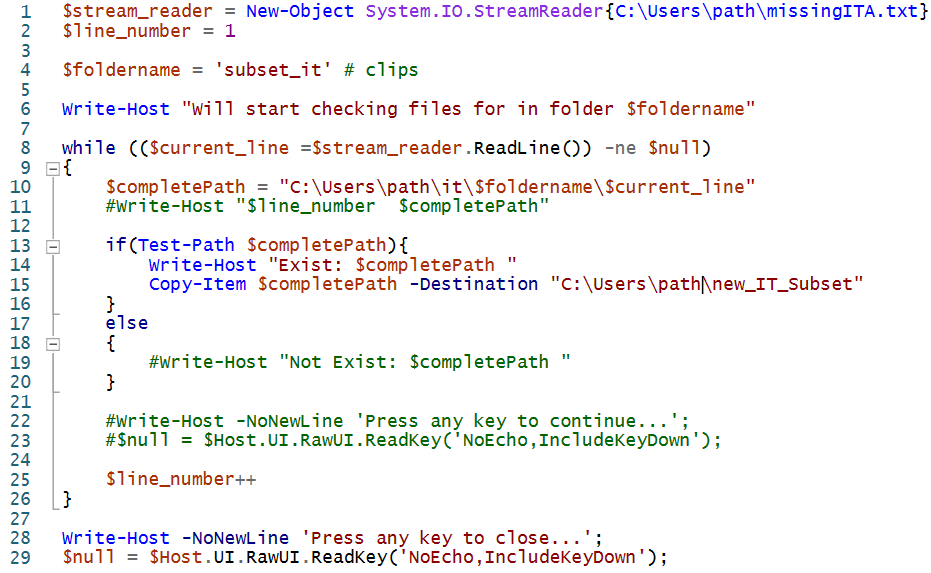


Now that the missing file were retrieved and uploaded is possible to proceed and extract the prosodic features.

Since the function takes in a dataframe, let's create one with only the missing files in it.

In [ ]:
# let's create a copy of the original df

# copy_ITdf = IT_info_df.copy()

# # since we are now dealing with a different path, we will
# # rely only on the filename in the dataframe

# def no_path(path_el):
#   el = os.path.split(path_el)[-1]
#   return el

# copy_ITdf['filename'] = copy_ITdf['filename'].apply(no_path)


# # let's create the subdataframe with the missing files that will be passed 
# # to the function to get the prosodic features

# missing_IT_df = copy_ITdf[copy_ITdf['filename'].isin(missing_ita_audio)]

# We can now call the function with the dataframe to get the features 

# IT_pros_feats_arr2 = prosody_feats(missing_IT_df,'/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/new_IT_Subset', 'it2_int_ok')

# pickle loading

%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/new_IT_Subset


with open('it2_int_ok_pros_arrays.pkl', 'rb') as f:  
  it_arrays2 = pickle.load(f)


/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/new_IT_Subset


Now we have to join the first dictionary that we created with the second one with the arrays correspondig to the missing files.

In [ ]:
for aud in ita_arrays.keys():
  for miss_aud, miss_val in it_arrays2.items():
    if aud == miss_aud:
      ita_arrays[aud] = miss_val

# it should be ok, but let's check for duplicates again

it_arr_completeK, it_arr_completeV =  check_duplicates_arr(ita_arrays)

print(len(it_arr_completeK))
print(len(it_arr_completeV))

0
0


No duplicates! Italian corpus is now ready.

In [ ]:
%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML

# let's save it here as a pkl file

# pkl_name = f"ITA_pros_arrays_int_ok.pkl"
# with open(pkl_name, 'wb') as file:
#   pickle.dump(ita_arrays, file)

# let's load the italian array corpus

with open('ITA_pros_arrays_int_ok.pkl', 'rb') as f:  
  it_arrays = pickle.load(f)

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML


### German features extraction

Something is wrong with the DE audiofiles! 
Let's retrieve the missing files with the same procedure.

To keep the data balanced with the other corpus I pick 10500 files - altohough there were many more avilable.

In [ ]:
%cd '/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/cv_DATA/downloads/extracted/e3bba0313eb6a1ef74488614da88aab5af6b5b4aff3de86373ba0182fb7850a1/cv-corpus-6.1-2020-12-11/de/clips'

de_in_dir = [ ]     # list with audiofiles that are in the Drive
de_miss_dir = [ ]   # list with audiofiles that are not in the Drive


filenames_de = [key for key in DE_info_df['filename']]


for fls in filenames_de: 
  fls = os.path.split(fls)[-1] # separating filename from rest of the path
  if os.path.isfile(fls): # 79
    de_in_dir.append(fls)
  else:
    de_miss_dir.append(fls) # 14921

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/cv_DATA/downloads/extracted/e3bba0313eb6a1ef74488614da88aab5af6b5b4aff3de86373ba0182fb7850a1/cv-corpus-6.1-2020-12-11/de/clips


In [ ]:
# saving the missing file's name in a txt
# to pass it to the Powershell script

%cd /content/drive/MyDrive/MACHINE_LEARNING
with open("missingDE.txt", "w") as output:
  for filen in de_miss_dir:
    output.write('%s\n' % filen)

In [ ]:
# Now the missing files are on the drive and we can obtain the arrays for the german files

# WORKING AND DONE
# DE_pros_feats_arr = prosody_feats(DE_info_df,'/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/new_DE_Subset/', 'de_int_ok') # 10500 files


# Retrieving the DE dictionary with the arrays

%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/new_DE_Subset/

with open('de_pros_arrays.pkl', 'rb') as f:  
  de_arrays = pickle.load(f)

Let's check if there are duplicates among the values

In [ ]:
de_dupK, de_dupV = check_duplicates_arr(de_arrays)

flattenK_de = [ ]
flattenV_de = [ ]

for el in de_dupK:
  for ele in el:
    flattenK_de.append(ele)

len(flattenK_de) # we have 12 problematic files.

# Since we already have a sufficient amount of files for german
# we can simply eliminate the from the dictionary.

for key in flattenK_de:
  del de_arrays[key] # dropping the problematic files

de_dupK1, de_dupV1 = check_duplicates_arr(de_arrays) # checking for duplicates again

flattenK1_de = [ ]

for el in de_dupK1:
  for ele in el:
    flattenK1_de.append(ele)

len(flattenK1_de)

No duplicates! German dataset is also ready.

In [ ]:
%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML

# let's save it here as a pkl file

# pkl_name = f"DE_pros_arrays_int_ok.pkl"
# with open(pkl_name, 'wb') as file:
#   pickle.dump(DE_pros_feats_arr, file)

# let's load the german array corpus

with open('DE_pros_arrays_int_ok.pkl', 'rb') as f:  
  de_arrays = pickle.load(f)

# Data preparation for the training

<br/>

Since we are going to pass the data to a LSTM model, we have to make sure to shape the  data in the form that the model is expecting.
Each set (train, set and validation) must be shaped as a 3D array representing the number of samples (audio files), the number of features for each file (time stamps with repsective pitch and intensity value) and number of features in each time step. 

<br/>

In order to reshape the data in the proper way, we have to make sure that each one of the file has the same number of time steps, even if we are using file with different lengths.
For this purpose it is important to design a padding/truncating function that adjusts each time step length according to the desired length.  

In [ ]:
# let's load the dictionaries with the data

# dict structure:

# { file1 : { 'pitch' : *pitch sequence as array*,
#          'intensity : *intensity sequence as array*},   
#   file2 : { 'pitch' : *pitch sequence as array*,
#          'intensity : *intensity sequence as array*}
#   ... } 

%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML

with open('ITA_pros_arrays_int_ok.pkl', 'rb') as f:  
  it_arrays = pickle.load(f)


with open('DE_pros_arrays_int_ok.pkl', 'rb') as f:  
  de_arrays = pickle.load(f)

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML


In [ ]:
len(de_arrays) 
len(it_arrays)

To manage data in a easier way we transform the nested dictionary in a Pandas dataframe

In [ ]:
ita_arr_df = pd.DataFrame.from_dict(it_arrays, orient= "index" ) 
de_arr_df = pd.DataFrame.from_dict(de_arrays, orient= "index" ) 

# joining the corpora

it_de_df = ita_arr_df

it_de_df = it_de_df.append(de_arr_df)


## Let's flatten the intensity array (is a list of 1 item lists)

def flatten(regular_list):
  f = [item for sublist in regular_list for item in sublist]
  my_array = np.array(f)
  return my_array

it_de_df['intensity'] = it_de_df['intensity'].apply(flatten) 

In [8]:
%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/

# let's save it here as a pkl file

# pkl_name = f"it_de_df.pkl"
# with open(pkl_name, 'wb') as file:
#   pickle.dump(it_de_df, file)


with open('it_de_df.pkl', 'rb') as f:  
  it_de_df = pickle.load(f)

it_de_df.head()

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML


,pitch,intensity
common_voice_it_17415794.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[38.446419124715064, 38.408019194804716, 36.63..."
common_voice_it_17415834.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[49.025946279876706, 48.2836106621921, 47.4138..."
common_voice_it_17415835.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[22.407489797282306, 21.324847422149354, 21.42..."
common_voice_it_17415844.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[42.47672550799659, 40.93955629336782, 38.0002..."
common_voice_it_17415850.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[32.42885384325419, 31.374178360328333, 30.504..."


The intensity and pitch arrays are not padded yet so they have different lengths.

In [ ]:
print(len(it_de_df['pitch'][2]))
print(len(it_de_df['pitch'][789]))
print(len(it_de_df['intensity'][2]))
print(len(it_de_df['intensity'][789]))

778
696
775
694


## Function to prepare the data



To make easier the creation of experimental sets of data by manipulating parameters as sampling rate, binning technique and type of matrix, a main function that calls the functions related to the previous mentioned parameters and adjust the padding has been designed.

<br/>

**Functions to handle parameters:**

1. *bin_array(array, time_steps, sampling_technique):*
takes in an array and applies the desired bin technique to resume the data and adapt it to the desired sampling rate.

  Example of binning by mean:

   <br/>

  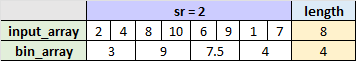

 <br/>

2. *pad_len(df, filelist)*:
 takes a dataframe and a list of file names,   filters the dataframe according to the files in the list (8 seconds files in this case) and returns pad/truncating size

  <br/>

3. *pad_trn(arr, max_len)*:
 pads and truncates arrays according to a fixed length

  <br/>

 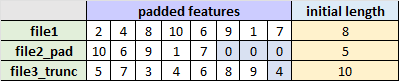

 <br/>

4. *mat3D(df)*:

  takes a dataframe and transforms it in a 3D array by associating the values of two features to each time stamp for each file.

 <br/>

  2D matrix example
  pitch and intensity are subsequent sequences 
  (1 feature for each timestep)

  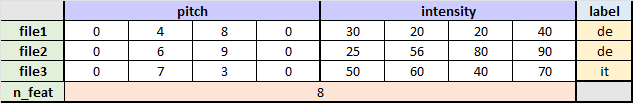

 <br/>

  3D matrix example
  for time step we have pitch and intensity 
  (2 features for each time step).

  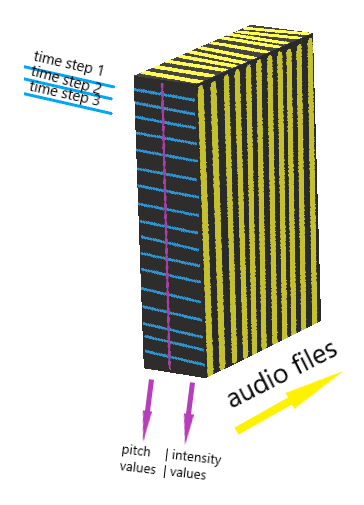

  5. *resample_experiments(df, fileslist time_steps, sampling_technique, matrix_type)*:

  main function that takes a dataframe, a list of files, a sampling rate, a binning technique and a matrix type and returns the data ready for the training. The output are the train, validation and test set already as 3D shaped numpy arrays, ready to be implemented in the NN.
  Train, test and validation split is made with sklearn with a test set size of 0.20.


In [14]:
# (1) array bucket - to be applied to each row of the two columns

def bin_array(array, time_steps, sampling_technique):

  """Takes in an array, a sampling rate and a sampling technique and
  adapts the data according to the input preferences."""
  # print(len(array))
  n_bucket = len(array)/time_steps
  bucket_size = len(array)/n_bucket

  # print('number of buckets', n_bucket)
  # print('elements in bucket', bucket_size)
  
  buckets = np.array_split(array, n_bucket) # list of buckets

  mean_buckets = [ ]
  median_buckets = [ ]

  if sampling_technique == 'mean':
    for buck in buckets:
      buck = statistics.mean(buck)
      mean_buckets.append(buck)
      # print(mean_buckets)

    return np.array(mean_buckets)

  elif sampling_technique == 'median':
    for buck in buckets:
      buck = statistics.median(buck)
      median_buckets.append(buck)
    # print(median_buckets)

    return np.array(median_buckets)


# (2) custom padding depends on the length of each array that changes according to the binning
# we extract the len from the files 8 sec long

def pad_len(df, fileslist):

  """filters the dataframe for 8s files
  and returns pad size"""

  # subdf by file name - 8 len sec rows
  
  temp_list = [ ]

  for index, row in df.iterrows():
    # print(index)
    if index in fileslist:
      temp_list.append(row[['pitch', 'intensity']]) 
  temp_df8 = pd.DataFrame(temp_list)

  # print(len(temp_df8))
  # max value of each sub col

  pi_max = temp_df8["pitch"].str.len().max()
  # print(pi_max)
  in_max = temp_df8["intensity"].str.len().min()
  # print(in_max)

  return max(pi_max, in_max)


def pad_trn(arr, max_len):

  """pads and truncates arrays according to a fixed length"""
  
  if len(arr) < max_len:
    padded = np.pad(arr, (0, (max_len-len(arr))))
  elif len(arr) > max_len:
    padded = arr[ : max_len]
  else:
    padded = arr

  return padded


def mat3D(df):

  """takes a dataframe and creates a 3D matrix"""

  temp_list = []

  for index, row in df.iterrows():
      temp_list.append(row['pitch']) 
      temp_list.append(row['intensity']) 
  matrix = pd.DataFrame(temp_list)
  return matrix



# MAIN FUNCTION

def resample_experiments(df, fileslist, time_steps, sampling_technique, matrix_type):

  # binning according to defined timestep

  df['pitch'] = df['pitch'].apply(bin_array, args = [time_steps, sampling_technique])
  df['intensity'] = df['intensity'].apply(bin_array, args = [time_steps, sampling_technique])

  print('binning done')

  # padding size based on 8 sec long files

  pad_size = pad_len(df, fileslist)
  print(pad_size)


  # padding / truncating


  df["pitch"] = df["pitch"].apply(pad_trn, args = [pad_size])
  df["intensity"] = df["intensity"].apply(pad_trn, args = [pad_size])

  print('padding done')

  # creating and appending labels

  it_lab = ['it']*len(df.filter(like='_it_', axis=0))
  de_lab = ['de']*len(df.filter(like='_de_', axis=0))

  
  labels = it_lab + de_lab
  df['labels'] = labels
  le = LabelEncoder()
  df['labels'] = le.fit_transform(df['labels'])
  
  print('labels done')

  # dataset split in train and test

  training_set, test_set = train_test_split(df, test_size = 0.2, shuffle = True, random_state = 21)

  print('train test split done')

  if matrix_type == '2Dsequence':

    print('entered 2d matrix')

    matrix_Xtrain = pd.concat([ pd.DataFrame(training_set['pitch'].to_list()) ,  pd.DataFrame(training_set['intensity'].to_list()) ], axis=1 )
    matrix_Xtest = pd.concat([ pd.DataFrame(test_set['pitch'].to_list()) ,  pd.DataFrame(test_set['intensity'].to_list()) ], axis=1 )
   
    X_train = matrix_Xtrain.iloc[:,:].to_numpy()
    y_train = training_set.iloc[:,-1].to_numpy()
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1) 
    # print("val split ok")
   
    X_test = matrix_Xtest.iloc[:,:].to_numpy()
    # print(X_test.shape)
    y_test = test_set.iloc[:,-1].to_numpy()
    # print(y_test.shape)

    X_train = X_train.reshape(len(X_train), len(X_train[0][:]), 1)
    X_test = X_test.reshape(len(X_test), len(X_test[0][:]), 1)
    X_val = X_val.reshape(len(X_val), len(X_val[0][:]), 1) 
    print('reshape val ok')
    # print(X_train.shape)
    # print(X_test.shape)

  elif matrix_type == '3Dsequence':
    
    X_train, X_val = train_test_split(training_set, test_size = 0.2, shuffle = True, random_state = 21)

    X_train_3D = mat3D(X_train.iloc[:,0:-1]).to_numpy()
    y_train = X_train.iloc[:,-1].to_numpy()

    print("train split ok")

    X_val_3D = mat3D(X_val.iloc[:,0:-1]).to_numpy()
    y_val = X_val.iloc[:,-1].to_numpy()
    
    print("val split ok")

     # test

    X_test_3D = mat3D(test_set.iloc[:,0:-1]).to_numpy()
    y_test = test_set.iloc[:,-1].to_numpy()
   
   
    print("X y train, val, test ok")


    X_train = np.reshape(X_train_3D, (len(X_train), len(X_train_3D[0]), 2))
    print('reshape train ok')
    # print(X_train.shape)
    X_test = np.reshape(X_test_3D, (len(test_set), len(X_train_3D[0]), 2))
    print('reshape test ok')
    X_val = np.reshape(X_val_3D, (len(X_val), len(X_train_3D[0]), 2)) 
    print('reshape val ok')
    print(X_val.shape)

  return X_train, y_train, X_test, y_test, X_val, y_val

Plot of a pitch sequence before and after binning 

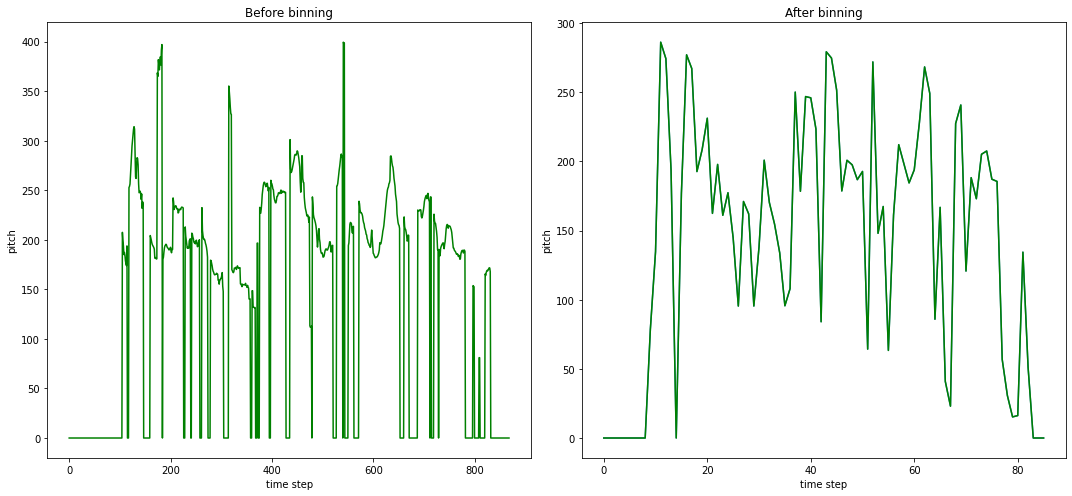

In [ ]:
plt.rcParams["figure.figsize"] = [15, 7]

plt.subplot(1, 2, 1) # row 1, col 2 index 1
y1 = it_de_df['pitch'][0]
x1 = range(0, len(y1))
plt.plot(x1, y1, color="green")
plt.title("Before binning")
plt.xlabel('time step')
plt.ylabel('pitch')

plt.subplot(1, 2, 2) # index 2
y2 = it_de_df['pitch'][0]
x2 = range(0, len(y2))
plt.plot(x2, y2)
plt.title("After binning")
plt.plot(x2, y2, color="green")
plt.xlabel('time step')
plt.ylabel('pitch')


plt.show()

In [15]:
%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/


with open('it_de_df.pkl', 'rb') as f:  
  it_de_df = pickle.load(f)




/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML


In [16]:
X_train, y_train, X_test, y_test, X_val, y_val = resample_experiments(it_de_df, list_file8, 30, 'mean', '3Dsequence') # 2 min

binning done
29
padding done
labels done
train test split done
train split ok
val split ok
X y train, val, test ok
reshape train ok
reshape test ok
reshape val ok
(3335, 29, 2)


In [17]:
X_train.shape

(13340, 29, 2)

In [ ]:
#  functon to extract sets for the baseline 

def baseline_feat(arr, sampling_tech):

  if sampling_tech == 'mean':
      arr = statistics.mean(arr)
     
      return arr

  elif sampling_tech == 'median':
      arr = statistics.median(arr)
     
      return arr

matrix_type = input()

it_de_df["pitch"] = it_de_df["pitch"].apply(baseline_feat, args = ['mean'])
it_de_df["intensity"] = it_de_df["intensity"].apply(baseline_feat, args = ['mean'])


# creating and appending labels

it_lab = ['it']*len(it_de_df.filter(like='_it_', axis=0))
de_lab = ['de']*len(it_de_df.filter(like='_de_', axis=0))


labels = it_lab + de_lab
it_de_df['labels'] = labels
le = LabelEncoder()
it_de_df['labels'] = le.fit_transform(it_de_df['labels'])

print('labels done')

# dataset split in train and test

training_set, test_set = train_test_split(it_de_df, test_size = 0.2, shuffle = True, random_state = 21)

print('train test split done')

if matrix_type == '2Dsequence':

  print('entered 2d matrix')

  matrix_Xtrain = pd.concat([ pd.DataFrame(training_set['pitch'].to_list()) ,  pd.DataFrame(training_set['intensity'].to_list()) ], axis=1 )
  matrix_Xtest = pd.concat([ pd.DataFrame(test_set['pitch'].to_list()) ,  pd.DataFrame(test_set['intensity'].to_list()) ], axis=1 )
  
  X_train = matrix_Xtrain.iloc[:,:].to_numpy()
  y_train = training_set.iloc[:,-1].to_numpy()
  
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1) 
  # print("val split ok")
  
  X_test = matrix_Xtest.iloc[:,:].to_numpy()
  # print(X_test.shape)
  y_test = test_set.iloc[:,-1].to_numpy()
  # print(y_test.shape)

  X_train = X_train.reshape(len(X_train), len(X_train[0][:]), 1)
  X_test = X_test.reshape(len(X_test), len(X_test[0][:]), 1)
  X_val = X_val.reshape(len(X_val), len(X_val[0][:]), 1) 
  print('reshape val ok')
  # print(X_train.shape)
  # print(X_test.shape)

elif matrix_type == '3Dsequence':
  
  X_train, X_val = train_test_split(training_set, test_size = 0.2, shuffle = True, random_state = 21)

  X_train_3D = mat3D(X_train.iloc[:,0:-1]).to_numpy()
  y_train = X_train.iloc[:,-1].to_numpy()

  print("train split ok")

  X_val_3D = mat3D(X_val.iloc[:,0:-1]).to_numpy()
  y_val = X_val.iloc[:,-1].to_numpy()
  
  print("val split ok")

    # test

  X_test_3D = mat3D(test_set.iloc[:,0:-1]).to_numpy()
  y_test = test_set.iloc[:,-1].to_numpy()
  
  
  print("X y train, val, test ok")


  X_train = np.reshape(X_train_3D, (len(X_train), len(X_train_3D[0]), 2))
  print('reshape train ok')
  # print(X_train.shape)
  X_test = np.reshape(X_test_3D, (len(test_set), len(X_train_3D[0]), 2))
  print('reshape test ok')
  X_val = np.reshape(X_val_3D, (len(X_val), len(X_train_3D[0]), 2)) 
  print('reshape val ok')
  print(X_val.shape)



In [ ]:
X_train.shape

(13340, 2, 2)

# Neural Network training

## Keras

Keras is a deep learning API to implement Neural Networks (NN).

We will train on 3 different models:

1. LSTM
2. CNN - Convolutional Neural Network
3. CNN + LSTM

For each one of the models serveral experimental trains will be done by changing the above mentioned parameters starting from the sample rate.

Regularization to avoid model overfitting and/or underfitting is handled with the Early stopping function of Keras, that has been implemented with a patience threshold of 7, meaning that if the model doesn't improve in the following 7 epochs the training will stop. 
To avoid overfitting, everytime that the model improves it is temporarily saved and if the patience threshold is reached the model with the best accuracy so far will be saved and ready to use.

The default number of epochs is 100.

For the LSTM architecture the sigmoid activation function and the binary cross entropy loss function have been implemented.

### (1) LSTM

In [ ]:
def LSTM_train(X_train, y_train, X_test, y_test, X_val, y_val, batch_size, ft, epochs=100):

  numpy.random.seed(7)

  max_length = len(X_train[0][:])                                                       

  es = EarlyStopping(monitor = 'val_loss', patience = 7, verbose = 1)
  mc =  ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

  # create the model

  model = Sequential()
  model.add(LSTM(64, input_shape= (max_length, ft)))     
  model.add(Dense(1, activation ='sigmoid'))                                           
                                                                                      
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())                                                       
  history = model.fit(X_train, y_train, epochs=epochs, batch_size= batch_size, validation_data=(X_val, y_val), callbacks = [es, mc])
                                                                               
  hist_df = pd.DataFrame(history.history)


  # Final evaluation of the model

  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  return scores, hist_df, history

In [ ]:

saved_model = load_model('best_model.h5')

#### 2D gym

In [ ]:
# 2D train gym

seq2D_ALL_mean_sc, seq2D_ALL_mean_df, seq2D_ALL_mean_history = LSTM_train(X_train, y_train, X_test, y_test,  X_val, y_val, 32, 1) 

In [ ]:
#ID = matrix, ts, sampling, epochs

%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/LSTM_resultsDF

# let's save it here as a pkl file

with open('seq2D_ALL_mean.pkl', 'wb') as f:  
  pickle.dump([seq2D_ALL_mean_sc, seq2D_ALL_mean_df, seq2D_ALL_mean_history], f)

# let's load the german array corpus

# with open('seq2D_10_mean_df.pkl', 'rb') as f:  
#   seq2D_10_mean_df = pickle.load(f)

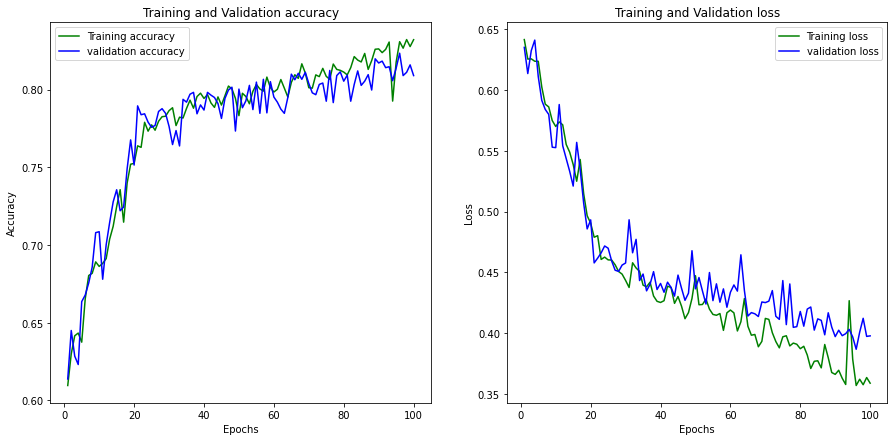

In [ ]:
# example plot of training history

plt.rcParams["figure.figsize"] = [15, 7]

plt.subplot(1, 2, 1) 

loss_train = seq2D_1_mean_history.history['accuracy']
loss_val = seq2D_1_mean_history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) # row 1, col 2 index 1
loss_train = seq2D_1_mean_history.history['loss']
loss_val = seq2D_1_mean_history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### 3D gym

In [ ]:
# 3D train gym

seq3D_ALL_median_sc, seq3D_ALL_median_df, seq3D_ALL_median_history  = LSTM_train(X_train, y_train, X_test, y_test,X_val, y_val, 32, 2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17152     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,217
Trainable params: 17,217
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
416/417 [============================>.] - ETA: 0s - loss: 0.5772 - accuracy: 0.7124
Epoch 1: val_loss improved from inf to 0.56234, saving model to best_model.h5
417/417 [==============================] - 9s 12ms/step - loss: 0.5770 - accuracy: 0.7125 - val_loss: 0.5623 - val_accuracy: 0.7169
Epoch 2/100
410/417 [============================>.] - ETA: 0s - loss: 0.5668 - accuracy: 0.7172
Epoch 2: val_loss improved from 0.562

In [ ]:
# example plot of training history

plt.rcParams["figure.figsize"] = [15, 7]

plt.subplot(1, 2, 1) 

loss_train = history3D.history['accuracy']
loss_val = history3D.history['val_accuracy']
epochs = range(1,23)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) # row 1, col 2 index 1
loss_train = history3D.history['loss']
loss_val = history3D.history['val_loss']
epochs = range(1,23)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# saving results and best model

#ID = matrix, ts, sampling, epochs

%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/LSTM_resultsDF

# let's save it here as a pkl file

with open('seq3D_ALL_median.pkl', 'wb') as f:  
    pickle.dump([seq3D_ALL_median_sc, seq3D_ALL_median_df, seq3D_ALL_median_history], f)

# let's load the german array corpus

# with open('seq2D_10_mean_df.pkl', 'rb') as f:  
#   seq2D_10_mean_df = pickle.load(f)

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/LSTM_resultsDF


INFO:tensorflow:Assets written to: ram://5fc7d332-e2a7-47c1-8ef1-bdf1362e1026/assets


INFO:tensorflow:Assets written to: ram://5fc7d332-e2a7-47c1-8ef1-bdf1362e1026/assets


### LSTM results table

In [ ]:
%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/

LSTM_df = pd.read_csv ('/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/LSTM.csv', delimiter=';')
print(LSTM_df)

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML
   MATRIX   SR BINNING  ACCURACY  EPOCHS
0      3D    1    mean     78.75      39
1      3D    5    mean     82.37      39
2      3D    1    mean     78.75      39
3      3D   10    mean     79.61      19
4      3D   10  median     80.88      31
5      3D   15    mean     78.68      21
6      3D   15  median     78.84      31
7      3D   30    mean     77.48      35
8      3D   30  median     80.04      25
9      3D   50    mean     78.03      29
10     3D   50  median     76.33      26
11     3D   70    mean     77.02      34
12     3D   70  median     77.52      41
13     3D  420    mean     73.59      44
14     3D  420  median     70.83      25
15     3D  840    mean     72.78      28
16     3D  840  median     70.54      18
17     2D    1    mean     82.01     100
18     2D    5    mean     81.24      41
19     2D   10  median     82.32      39
20     2D   10    mean     81.22      54
21     2D   15    mean     80.09      40
22 

In [ ]:
LSTM_df.nlargest(5, ['ACCURACY'])


,MATRIX,SR,BINNING,ACCURACY,EPOCHS
1,3D,5,mean,82.37,39
19,2D,10,median,82.32,39
17,2D,1,mean,82.01,100
22,2D,15,median,81.91,40
18,2D,5,mean,81.24,41


In [ ]:
LSTM_df.nsmallest(5, ['ACCURACY'])

,MATRIX,SR,BINNING,ACCURACY,EPOCHS
32,2D,840,median,69.44,28
29,2D,420,mean,70.30,38
16,3D,840,median,70.54,18
14,3D,420,median,70.83,25
31,2D,840,mean,70.95,22


In [ ]:
%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/LSTM_resultsDF

# # Getting back the objects:
with open('seq3D_5_mean.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
  seq3D_5_mean_sc, seq3D_5_mean_df, seq3D_5_mean_history = pickle.load(f)

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/LSTM_resultsDF


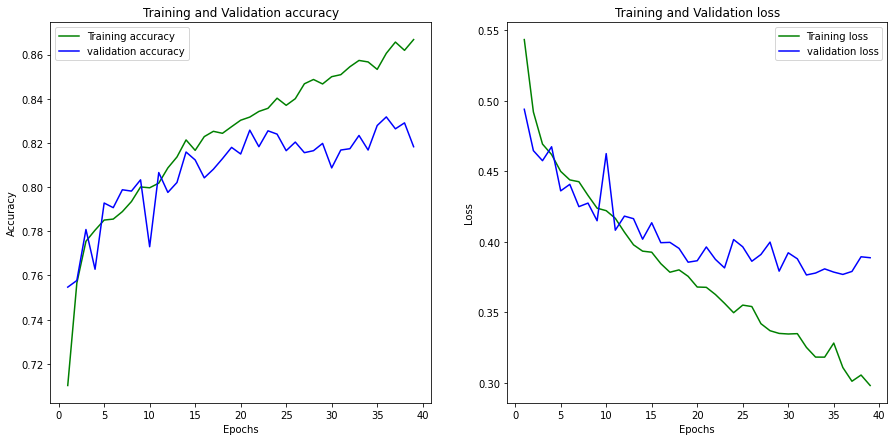

In [ ]:
# PLOT COMPARISON BETWEEN ACCURACY + SR

plt.rcParams["figure.figsize"] = [15, 7]

plt.subplot(1, 2, 1) 

loss_train = seq3D_5_mean_history.history['accuracy']
loss_val = seq3D_5_mean_history.history['val_accuracy']
epochs = range(1,40)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) # row 1, col 2 index 1
loss_train = seq3D_5_mean_history.history['loss']
loss_val = seq3D_5_mean_history.history['val_loss']
epochs = range(1,40)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# worst model plot

# # Getting back the objects:
with open('seq2D_ALL_median.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
 seq2D_ALL_median_sc, seq2D_ALL_median_df, seq2D_ALL_median_history = pickle.load(f)


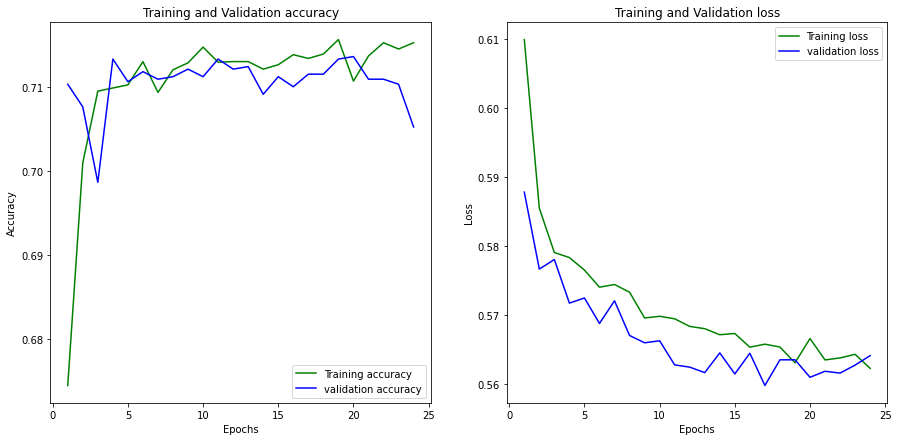

In [ ]:
plt.rcParams["figure.figsize"] = [15, 7]

plt.subplot(1, 2, 1) 

loss_train = seq2D_ALL_median_history.history['accuracy']
loss_val = seq2D_ALL_median_history.history['val_accuracy']
epochs = range(1,25)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) # row 1, col 2 index 1
loss_train = seq2D_ALL_median_history.history['loss']
loss_val = seq2D_ALL_median_history.history['val_loss']
epochs = range(1,25)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### (2) CNN


In [ ]:
def CNN_train(X_train, y_train, X_test, y_test, X_val, y_val, batch_size, ft, epochs=100):
  #create model

  max_length = len(X_train[0][:])                                                       

  es = EarlyStopping(monitor = 'val_loss', patience = 7, verbose = 1)
  mc =  ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

  model = Sequential()

  model.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape =(max_length, ft)))   # CNN layer
  model.add(MaxPooling1D((2), padding='same'))
  model.add(Flatten())
  model.add(Dense(50, activation='relu'))                                                         

  model.add(Dense(1))                                           # single neuron for binary classification                                                                                   
                                                                                      

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())
  history = model.fit(X_train, y_train, epochs=epochs, batch_size= batch_size, validation_data=(X_val, y_val), callbacks = [es, mc])


  hist_df = pd.DataFrame(history.history)


  # Final evaluation of the model

  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  return scores, hist_df, history


#### 2D train gym

In [ ]:
# 2D train gym

CNNseq2D_ALL_mean_sc, CNNseq2D_ALL_mean_df,  CNNseq2D_ALL_mean_history = CNN_train(X_train, y_train, X_test, y_test,  X_val, y_val, 32, 1) 

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 2, 64)             192       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 50)                3250      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
___________________________________________________

In [ ]:
%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN_resultsDF

# let's save it here as a pkl file

with open('CNNseq2D_ALL_mean.pkl', 'wb') as f:  
    pickle.dump([CNNseq2D_ALL_mean_sc, CNNseq2D_ALL_mean_df,  CNNseq2D_ALL_mean_history], f)

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN_resultsDF
INFO:tensorflow:Assets written to: ram://7cadd5c5-cd5c-4671-a3fe-79514fec7a59/assets


INFO:tensorflow:Assets written to: ram://7cadd5c5-cd5c-4671-a3fe-79514fec7a59/assets


#### 3D train gym

In [ ]:
# 3D train gym

CNNseq3D_ALL_median_sc, CNNeq3D_ALL_median_df, CNNeq3D_ALL_median_history = CNN_train(X_train, y_train, X_test, y_test,  X_val, y_val, 32, 2) 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 1, 64)             320       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 50)                3250      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,621
Trainable params: 3,621
Non-trainable params: 0
____________________________________________________

In [ ]:
%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN_resultsDF

# let's save it here as a pkl file

with open('CNNseq3D_ALL_median.pkl', 'wb') as f:  
    pickle.dump([CNNseq3D_ALL_median_sc, CNNeq3D_ALL_median_df, CNNeq3D_ALL_median_history], f)

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN_resultsDF
INFO:tensorflow:Assets written to: ram://977a1786-2783-4271-a5d1-25ee288880b0/assets


INFO:tensorflow:Assets written to: ram://977a1786-2783-4271-a5d1-25ee288880b0/assets


### Results CNN

In [ ]:
CNN_df = pd.read_csv ('/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN.csv', delimiter=';')
print(CNN_df)

   MATRIX   SR BINNING  ACCURACY  EPOCHS
0      3D    1    mean     49.94       8
1      3D    5    mean     50.06       8
2      3D   10    mean     50.06       8
3      3D   10  median     50.06       8
4      3D   15    mean     49.94       8
5      3D   15  median     50.06       8
6      3D   30    mean     49.96       8
7      3D   30  median     50.06       8
8      3D   50    mean     50.06       8
9      3D   50  median     50.06       8
10     3D   70    mean     50.06       8
11     3D   70  median     49.94       8
12     3D  420    mean     50.06       8
13     3D  420  median     49.94       8
14     3D  840    mean     49.87      10
15     3D  840  median     66.39       8
16     2D    1    mean     50.06       8
17     2D    5    mean     50.06       8
18     2D   10  median     50.06       8
19     2D   10    mean     49.94       8
20     2D   15    mean     50.06       8
21     2D   15  median     50.06       8
22     2D   30    mean     49.94       8
23     2D   30  

In [ ]:
CNN_df.nlargest(5, ['ACCURACY'])

,MATRIX,SR,BINNING,ACCURACY,EPOCHS
15,3D,840,median,66.39,8
25,2D,50,median,50.08,8
1,3D,5,mean,50.06,8
2,3D,10,mean,50.06,8
3,3D,10,median,50.06,8


In [ ]:
CNN_df.nsmallest(5, ['ACCURACY'])

,MATRIX,SR,BINNING,ACCURACY,EPOCHS
14,3D,840,mean,49.87,10
0,3D,1,mean,49.94,8
4,3D,15,mean,49.94,8
11,3D,70,median,49.94,8
13,3D,420,median,49.94,8


In [ ]:
# plot 
%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN_resultsDF

with open('CNNseq3D_5_mean.pkl', 'rb') as f:  
  CNNseq3D_5_mean_sc, CNNseq3D_5_mean_df,  CNNseq3D_5_mean_history = pickle.load(f)

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN_resultsDF


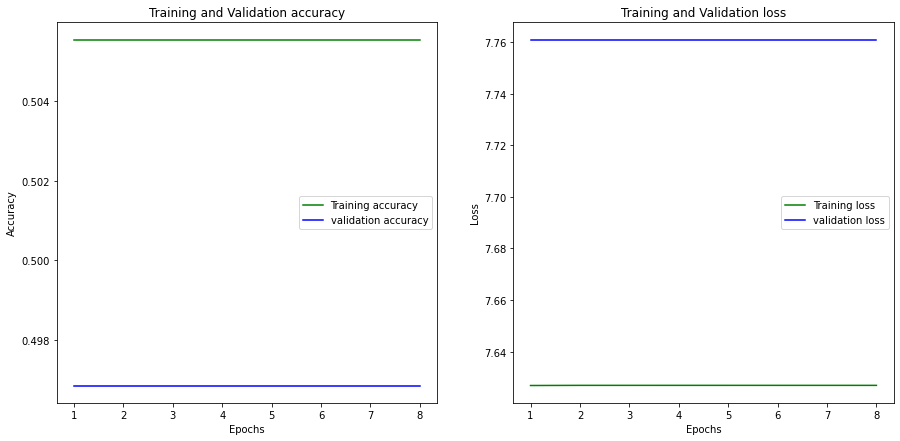

In [ ]:
plt.rcParams["figure.figsize"] = [15, 7]

plt.subplot(1, 2, 1) 

loss_train = CNNseq3D_5_mean_history.history['accuracy']
loss_val = CNNseq3D_5_mean_history.history['val_accuracy']
epochs = range(1, 9)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) # row 1, col 2 index 1
loss_train = CNNseq3D_5_mean_history.history['loss']
loss_val = CNNseq3D_5_mean_history.history['val_loss']
epochs = range(1, 9)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### (3) CNN + LSTM model implementation

based on tutorial with IBDM data 

In [ ]:
def CNN_LSTM_train(X_train, y_train, X_test, y_test, X_val, y_val, batch_size, ft, epochs=100):
  
  max_length = len(X_train[0][:])                                                       

  es = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
  mc =  ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

  model = Sequential()

  model.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape =(max_length, ft)))   # CNN layer
  model.add(MaxPooling1D((2), padding='same'))

  model.add(LSTM(64))     
  model.add(Dense(1, activation='sigmoid'))                                           
                                                                                      
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())                                                      
  history = model.fit(X_train, y_train, epochs=epochs, batch_size= batch_size, validation_data=(X_val, y_val), callbacks = [es, mc])
                                                                     
  hist_df = pd.DataFrame(history.history)

  # Final evaluation of the model

  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  return scores, hist_df, history

#### 2D gym

In [ ]:
CNNLSTMseq2D_ALL_mean_sc, CNNLSTMseq2D_ALL_mean_df, CNNLSTMseq2D_ALL_mean_history = CNN_LSTM_train(X_train, y_train, X_test, y_test,  X_val, y_val, 32, 1) 

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 2, 64)             192       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 33,281
Trainable params: 33,281
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
413/417 [============================>.] - ETA: 0s - loss: 0.5705 - accuracy: 0.7186
Epoch 1: val_

In [ ]:
#ID = matrix, ts, sampling, epochs

%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN_LSTM_resultsDF

# let's save it here as a pkl file

with open('CNNLSTMseq_mean2D_ALL.pkl', 'wb') as f:  
    pickle.dump([CNNLSTMseq2D_ALL_mean_sc, CNNLSTMseq2D_ALL_mean_df, CNNLSTMseq2D_ALL_mean_history], f)

# let's load the german array corpus

# with open('seq2D_10_mean_df.pkl', 'rb') as f:  
#   seq2D_10_mean_df = pickle.load(f)

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN_LSTM_resultsDF


INFO:tensorflow:Assets written to: ram://43f02b23-ef3c-4751-aea3-e1b307246349/assets


INFO:tensorflow:Assets written to: ram://43f02b23-ef3c-4751-aea3-e1b307246349/assets


#### 3D gym

In [ ]:
CNNLSTMseq3D_ALL_median_sc, CNNLSTMseq3D_ALL_median_df, CNNLSTMseq3D_ALL_median_history = CNN_LSTM_train(X_train, y_train, X_test, y_test,  X_val, y_val, 32, 2) 

In [ ]:
%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN_LSTM_resultsDF

# let's save it here as a pkl file

with open('CNN_LSTM_seq3D_ALL_median.pkl', 'wb') as f:  
    pickle.dump([CNNLSTMseq3D_ALL_median_sc, CNNLSTMseq3D_ALL_median_df, CNNLSTMseq3D_ALL_median_history], f)

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN_LSTM_resultsDF


INFO:tensorflow:Assets written to: ram://8dd44e86-04fa-40ce-85a5-a5b380c02053/assets


INFO:tensorflow:Assets written to: ram://8dd44e86-04fa-40ce-85a5-a5b380c02053/assets


### Results CNN + LSTM

In [ ]:
CNNLSTM_df = pd.read_csv ('/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNNLSTM.csv', delimiter=';')
print(CNNLSTM_df)

   MATRIX   SR BINNING  ACCURACY  EPOCHS
0      3D    1    mean     78.99      25
1      3D    5    mean     83.79      30
2      3D   10    mean     79.71      21
3      3D   10  median     82.66      30
4      3D   15    mean     78.89      21
5      3D   15  median     79.35      30
6      3D   30    mean     76.85      22
7      3D   30  median     82.64      33
8      3D   50    mean     75.29      40
9      3D   50  median     76.47      29
10     3D   70    mean     74.81      26
11     3D   70  median     75.75      26
12     3D  420    mean     73.28      12
13     3D  420  median     69.61      15
14     3D  840    mean     72.82      15
15     3D  840  median     70.98      19
16     2D    1    mean     68.48      10
17     2D    5    mean     86.35      32
18     2D   10  median     82.23      26
19     2D   10    mean     80.98      30
20     2D   15    mean     80.86      27
21     2D   15  median     81.24      28
22     2D   30    mean     78.65      35
23     2D   30  

In [ ]:
CNNLSTM_df.nlargest(5, ['ACCURACY'])

,MATRIX,SR,BINNING,ACCURACY,EPOCHS
17,2D,5,mean,86.35,32
1,3D,5,mean,83.79,30
3,3D,10,median,82.66,30
7,3D,30,median,82.64,33
18,2D,10,median,82.23,26


In [ ]:
CNNLSTM_df.nsmallest(5, ['ACCURACY'])

,MATRIX,SR,BINNING,ACCURACY,EPOCHS
16,2D,1,mean,68.48,10
13,3D,420,median,69.61,15
31,2D,840,median,70.33,26
15,3D,840,median,70.98,19
29,2D,420,median,71.74,37


In [ ]:
# plots best model

%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN_LSTM_resultsDF

with open('CNN_LSTM_seq3D_10_median.pkl', 'rb') as f:  
  CNN_LSTM_seq3D_10_median_sc, CNN_LSTM_seq3D_10_median_df, CNN_LSTM_seq3D_10_median_history = pickle.load(f)



/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/CNN_LSTM_resultsDF


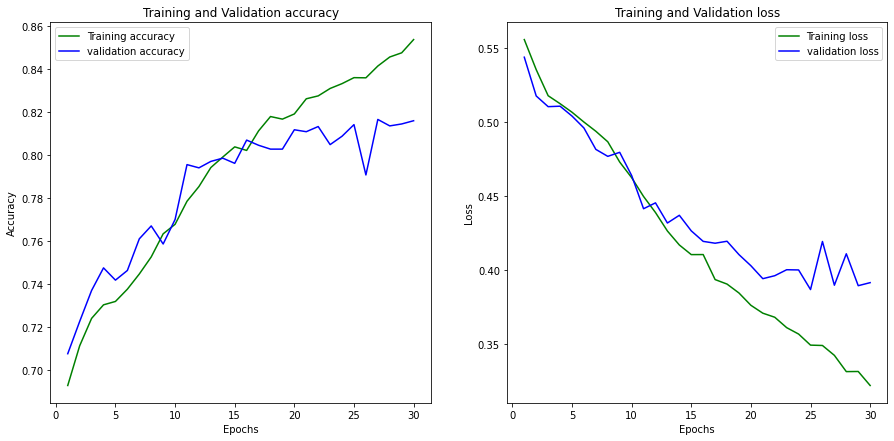

In [ ]:
plt.rcParams["figure.figsize"] = [15, 7]

plt.subplot(1, 2, 1) 

loss_train = CNN_LSTM_seq3D_10_median_history.history['accuracy']
loss_val = CNN_LSTM_seq3D_10_median_history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) # row 1, col 2 index 1
loss_train = CNN_LSTM_seq3D_10_median_history.history['loss']
loss_val = CNN_LSTM_seq3D_10_median_history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# plot of the worst performance

with open('CNNLSTMseq2D_1.pkl', 'rb') as f:  
  CNNLSTMseq2D_1_sc,CNNLSTMseq2D_1_df,CNNLSTMseq2D_1_history = pickle.load(f)

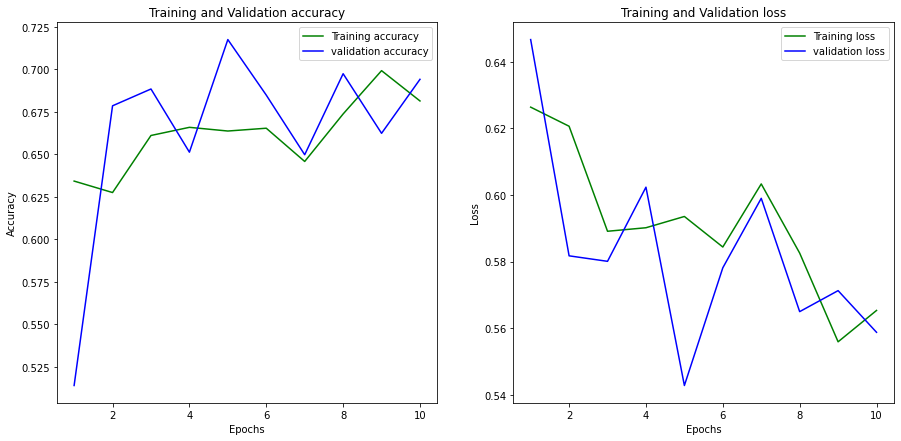

In [ ]:
plt.rcParams["figure.figsize"] = [15, 7]

plt.subplot(1, 2, 1) 

loss_train = CNNLSTMseq2D_1_history.history['accuracy']
loss_val = CNNLSTMseq2D_1_history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) # row 1, col 2 index 1
loss_train = CNNLSTMseq2D_1_history.history['loss']
loss_val = CNNLSTMseq2D_1_history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prediction with unseen data

In [ ]:
# new data example

%cd /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/NEW_SAMPLE


new_f = [f for f in glob.glob('/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/NEW_SAMPLE/*.mp3')]

list_new_f = [os.path.split(fname)[-1] for fname in new_f]

# checking if the files have been used for the training

for f in list_new_f:
  if f in list(it_de_df.index):
    print('nope')
  else:
    print(f)


## -> no, so I can use them as a sample.

# let's transform the list in a df

new_f_df = pd.DataFrame({'filename': list_new_f } )
new_f_df

/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/NEW_SAMPLE
common_voice_de_18222700.mp3
common_voice_de_19602292.mp3
common_voice_it_28153207.mp3
common_voice_it_28158164.mp3
common_voice_de_29727862.mp3
common_voice_de_29727804.mp3
common_voice_de_29727864.mp3


,filename
0,common_voice_de_18222700.mp3
1,common_voice_de_19602292.mp3
2,common_voice_it_28153207.mp3
3,common_voice_it_28158164.mp3
4,common_voice_de_29727862.mp3
5,common_voice_de_29727804.mp3
6,common_voice_de_29727864.mp3


In [ ]:
# feature extraction with Parselmouth

new_sample_feats = prosody_feats(new_f_df,'/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/NEW_SAMPLE', 'new_samples0')

new_sample_feats_df = pd.DataFrame.from_dict(new_sample_feats, orient= "index" ) # transforming feats in df

# flattening intensity

new_sample_feats_df['intensity'] = new_sample_feats_df['intensity'].apply(flatten) 

# transforming the data for the text

new_sample_feats_df["pitch"] = new_sample_feats_df["pitch"].apply(pad_trn, args = [898])
new_sample_feats_df["intensity"] = new_sample_feats_df["intensity"].apply(pad_trn, args = [898])

matrix_type = input()

new_sample_feats_df["pitch"] = new_sample_feats_df["pitch"].apply(bin_array, args = [15, 'mean'])
new_sample_feats_df["intensity"] = new_sample_feats_df["intensity"].apply(bin_array, args = [15, 'mean'])


if matrix_type == '2Dsequence':

  print('entered 2d matrix')

  matrix_new_set = pd.concat([ pd.DataFrame(new_sample_feats_df['pitch'].to_list()) ,  pd.DataFrame(new_sample_feats_df['intensity'].to_list()) ], axis=1 )

  newset = matrix_new_set.to_numpy()
  new_set = newset.reshape(len(newset), len(newset[0][:]), 1)

  print(new_set.shape)


elif matrix_type == '3Dsequence':
  
  matrix_new_set = mat3D(new_sample_feats_df)
  print(matrix_new_set)
  newset = matrix_new_set.to_numpy()
  new_set = newset.reshape(len(newset), len(newset[0][:]), 1)

  print(new_set.shape)

Current working directory: /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/NEW_SAMPLE
Current working directory: /content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/NEW_SAMPLE
2Dsequence
898
898
898
898
898
898
898
898
898
898
898
898
898
898
entered 2d matrix
(7, 118, 1)


In [ ]:
# predictions

filepath = '/content/drive/MyDrive/MACHINE_LEARNING/FINAL_PROJ_ML/LSTM_resultsDF/modelsLSTM/2D_15_meanmodel.h5'

# Load the model
model = load_model(filepath, compile = True) # 2D matrix with 15 sampling rate and binning with mean


# predictions = model.predict(new_set)

predictions = model.predict(new_set > 0.5).astype("int32")

print(predictions)

# DE - IT - IT - DE - DE - DE - DE

[[-1]
 [-2]
 [-2]
 [-2]
 [-2]
 [-2]
 [-2]]



# Conclusions

The variation of sampling rate simulated through the binning technique showed that there is a drop in accuracy of approximately 10% between the best result the was obtained with the CNN + LSTM architecture with a sampling rate of x5 and 5 features in each bucket and the other basline consisting in two features that resumed the values of pitch and intensity array. 
The experiments done by switching the dirretne parameters of the resample_experiment function show that having too many features can make the data too noisy for a proper learning, while the binning  technique can be adopted without a drastic worsening of the performance.
Overall, the best accuracy result over the training set was 86.35, while the least efficient one had a score of 70.33.

comparing the different arcitechture, the best results were obtained by combining a layer of CNN with LSTM as suggested in the studies used as a reference in this project.

Another facotr that had a considerate incidence on the results is the file length taken into consideration for padding and truncating. In these experiment I choose to limit it to 8 seconds since most files of my dataset had a length of 7 and 8 seconds. On the other end, longer sequences may be considered to let the machine identify and learn in more robust way the distinctive patterns among languages.  

Due to the limitations in RAM it was possible to include only two languages in this project, but more data can be easily and quickly implemented with better computational resources.




# Future work

Train the model with more languages and include some variation in the dataset to make the model more robust, for example longer read audio or spontaneous conversation data (although a bigger amount of data would be needed to train properly considering all the linguistic variation in real-time speech).
Counting with better computatioanl resources will allow to experiment with more data and include more languages.
It would be also interesting to finetune a model trained for a similar sequence classification task to see if there is an improvement in accuracy.





# References


*  Leoni, Pietro Maturi. 2006. Manuale di fonetica. 3. ed. con CD-ROM arricchito da nuovi materiali didattici, 5. rist, Carocci
*   Auer, Peter. 2001. Silben- und akzentzählende Sprachen. In Martin Haspelmath, Ekkehard König, Wulf Oesterreicher & Wolfgang Raible (eds.), Language typology and language universals. An international handbook, 1391-1399. De Gruyter.
* Davallius, Ingvarsson, Ortheden, Pettersson. 2019. Speech Categorization with Prosodic Features and Deep Learning (Thesis - Chalmers University).
* Ardila, R., Branson, M., Davis, K, Kohler, M., Meyer, J., Henretty, M., Morais, R., Saunders, L., Tyers, F., and Weber, G. 2020. Common voice: A massively-multilingual speech corpus. In Proceedings of the 12th Language Resources and Evaluation Conference, Marseille, France, May 2020, 4218-4222. [Common Voice](https://commonvoice.mozilla.org/en?gclid=CjwKCAjw5NqVBhAjEiwAeCa97RkwtrFu_b3_1P4E0pb-wW2rDO69eJtLUmmq6GX1Sp9LqSzXRlrZWxoCCQoQAvD_BwE ) 
*  Jadoul, Y., Thompson, B., & de Boer, B. (2018). Introducing Parselmouth: A Python interface to Praat. Journal of Phonetics, 71, 1-15. https://doi.org/10.1016/j.wocn.2018.07.001 [Parselmouth](https://parselmouth.readthedocs.io/en/stable/)




